# Лабораторна робота №1: Основи NumPy та Pandas

Перш за все необхідно імпортувати необхідні для виконання лабораторної роботи бібліотеки.

In [9]:
import pandas as pd
import numpy as np

In [21]:

!python3 -m pip install kagglehub

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 KB 1.2 MB/s eta 0:00:001.2 MB/s eta 0:00:01
  Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)


## 1. Підготовка датасету

### 1.1 Завантажте датасет

* Перейдіть за посиланням на Kaggle та завантажте файл [Full IMDb Movies Data](https://www.kaggle.com/datasets/anandshaw2001/imdb-data).
* Використовуючи бібліотеку `pandas` перетворіть дані з файлу у DataFrame.

In [25]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("anandshaw2001/imdb-data")
print(path)
df = pd.read_csv(path + '/Imdb Movie Dataset.csv')

/home/hoksly/.cache/kagglehub/datasets/anandshaw2001/imdb-data/versions/1


In [29]:
print(df.shape)
df.sample(1)

(1048575, 21)


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,...,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords
119067,471047,Lillehammer ’94: 16 Days of Glory,5.6,5,Released,11/27/1994,0,209,False,0,...,en,Lillehammer ’94: 16 Days of Glory,A documentary covering the 1994 Olympic Games ...,0.698,NaN,Documentary,Cappy Productions,United States of America,English,"sports, olympic games"


### 1.2 Відфільтруйте фільми для дітей

* Залиште у DataFrame лише ті записи, де поле `adult` дорівнює `False`, тобто фільми, які не є "дорослими".

In [31]:
 if 'adult' in df.columns:
    df_filtered = df[df['adult'] == False].copy()
else:
    df_filtered = df

### 1.3 Залиште лише необхідні стовпчики

* Відредагуйте DataFrame, залишивши у ньому лише наступні стовпчики:
    - `id`
    - `title`
    - `vote_average`
    - `vote_count`
    - `release_date`
    - `revenue`
    - `runtime`
    - `budget`
    - `original_language`
    - `production_companies`
    - `production_countries`
    - `spoken_languages`

In [36]:
df_filtered = df_filtered[['id',
    'title',
    'vote_average',
    'vote_count',
    'release_date',
    'revenue',
    'runtime',
    'budget',
    'original_language',
    'production_companies',
    'production_countries',
    'spoken_languages']] 
print(df_filtered.shape)
print(*list(df_filtered.columns))


(951555, 12)
id title vote_average vote_count release_date revenue runtime budget original_language production_companies production_countries spoken_languages


### 1.4 Видаліть записи без дати виробництва

* Видаліть з DataFrame усі рядки, де поле `release_date` містить порожнє значення (є `NaN`).

In [37]:
df_filtered.dropna(subset=['release_date'], inplace=True)
print(df_filtered.shape)

(780548, 12)


### 1.5 Форматуйте стовпчик `release_date`

* Перетворіть значення стовпчика `release_date` так, щоб залишився лише рік виробництва фільму, при цьому:
    * Врахуйте, що формат дати у стовпчику може варіюватися, наприклад, бути у вигляді `mm/dd/YYYY` або `DD-MM-YYYY`.
    * У результаті значення має бути представлене лише роком (наприклад, `2023`).

In [38]:
df_filtered['release_year'] = pd.to_datetime(df_filtered['release_date'], errors='coerce').dt.year
df_filtered.drop('release_date', axis=1, inplace=True)
print(df_filtered.head())

       id            title  vote_average  vote_count     revenue  runtime   
0   27205        Inception         8.364       34495   825532764      148  \
1  157336     Interstellar         8.417       32571   701729206      169   
2     155  The Dark Knight         8.512       30619  1004558444      152   
3   19995           Avatar         7.573       29815  2923706026      162   
4   24428     The Avengers         7.710       29166  1518815515      143   

      budget original_language   
0  160000000                en  \
1  165000000                en   
2  185000000                en   
3  237000000                en   
4  220000000                en   

                                production_companies   
0  Legendary Pictures, Syncopy, Warner Bros. Pict...  \
1  Legendary Pictures, Syncopy, Lynda Obst Produc...   
2  DC Comics, Legendary Pictures, Syncopy, Isobel...   
3  Dune Entertainment, Lightstorm Entertainment, ...   
4                                     Marvel Studios

## 2. Дослідження датасету

### 2.1 Порахуйте скільки всього фільмів у DataFrame

In [39]:
total_films = len(df_filtered)
print(f"Загальна кількість фільмів у DataFrame: {total_films}")

# Або так:
print(f"Загальна кількість фільмів у DataFrame: {df_filtered.shape[0]}")

Загальна кількість фільмів у DataFrame: 780548
Загальна кількість фільмів у DataFrame: 780548


### 2.2 Дослідження бюджету

__(a) Відфільтруйте фільми, бюджет (`budget`) котрих більше $100 тис. та запишіть їх у нову змінну.__

In [43]:
films_high_budget = df_filtered[df_filtered['budget'] > 100000].copy()

__(b) Порахуйте кількість фільмів, бюджет котрих більше $100 тис. (використайте створену змінну).__

In [44]:
count_high_budget = len(films_high_budget)
print(f"Кількість фільмів з бюджетом більше $100 тис.: {count_high_budget}")

Кількість фільмів з бюджетом більше $100 тис.: 18724


__(c) Порахуйте середній бюджет фільмів, бюджет котрих більше $100 тис. (використайте створену змінну).__

In [45]:
average_high_budget = films_high_budget['budget'].mean()
print(f"Середній бюджет фільмів з бюджетом більше $100 тис.: ${average_high_budget:.2f}")

Середній бюджет фільмів з бюджетом більше $100 тис.: $15320807.84


__(d) Виведіть назви (поле `title`) десятьох фільмів з найбільшими бюджетами.__

In [46]:
top_10_budget = df_filtered.sort_values(by='budget', ascending=False).head(10)
print("Топ-10 фільмів з найбільшими бюджетами:")
for index, row in top_10_budget.iterrows():
    print(row['title'])

Топ-10 фільмів з найбільшими бюджетами:
Enea
Adventures in Bora Bora
Avatar 5
Red Dead Redemption 2 (Movie)
Avatar 4
Avatar 3
Avatar: The Way of Water
Lost in the Stars
Pirates of the Caribbean: On Stranger Tides
Avengers: Age of Ultron


### 2.3 Дослідження мов та країн

__(a) Відфільтруйте фільми, які мають українську мову оригіналу (поле `original_language` дорівнює `uk`) та запишіть їх у нову змінну.__

In [49]:
ukrainian_original_language = df_filtered[df_filtered['original_language'] == 'uk'].copy()
ukrainian_original_language.sample(5)

,id,title,vote_average,vote_count,revenue,runtime,budget,original_language,production_companies,production_countries,spoken_languages,release_year
960218,871763,The Responsible Hero,0.0,0,0,5,0,uk,NaN,Ukraine,No Language,2021.0
487159,1053092,Fire in the House of Trade Unions,0.0,0,0,21,0,uk,NaN,Ukraine,NaN,2014.0
386331,1137630,Occupation: the price of the word,0.0,0,0,47,0,uk,Slidstvo.Info,Ukraine,NaN,2023.0
114568,266756,Friday,7.1,5,0,8,0,uk,NaN,Ukraine,NaN,2010.0
773976,439536,Fire Bird,0.0,0,0,9,0,uk,Kyivnaukfilm,Soviet Union,Ukrainian,1983.0


__(b) Порахуйте кількість фільмів, які мають українську мову оригіналу (використайте створену змінну).__

In [48]:
count_ukrainian_original_language = len(ukrainian_original_language)
print(f"Кількість фільмів з українською мовою оригіналу: {count_ukrainian_original_language}")

Кількість фільмів з українською мовою оригіналу: 2038


__(c) Відфільтруйте фільми, які були вироблені за участю України (поле `production_countries` містить рядок `Ukraine`) та запишіть їх у нову змінну.__

In [52]:
produced_in_ukraine = df_filtered[df_filtered['production_countries'].astype(str).str.contains('Ukraine', na=False)].copy()
produced_in_ukraine.sample(5)

,id,title,vote_average,vote_count,revenue,runtime,budget,original_language,production_companies,production_countries,spoken_languages,release_year
624486,1284968,Elevation,0.0,0,0,90,0,uk,NaN,"France, Ukraine",Ukrainian,2024.0
1034042,878598,Butterfly Dance,0.0,0,0,17,0,uk,NaN,Ukraine,Ukrainian,2021.0
454187,999882,Wrapped in Plastic,0.0,0,0,5,0,en,NaN,Ukraine,"English, Ukrainian",2020.0
591093,1289001,"Boots on the Ground, Hands in the Soil",0.0,0,0,15,0,en,NaN,"Netherlands, Ukraine, United Kingdom",Ukrainian,2023.0
945693,352576,Под прицелом любви,0.0,0,0,0,0,ru,Star Media,"Russia, Ukraine",Russian,2013.0


__(d) Порахуйте кількість фільмів, які були вироблені за участю України (використайте створену змінну).__

In [53]:
count_produced_in_ukraine = len(produced_in_ukraine)
print(f"Кількість фільмів, вироблених за участю України: {count_produced_in_ukraine}")

Кількість фільмів, вироблених за участю України: 2236


__(e) Використовуючи першу змінну з блоку `2.3` порахуйте кількість фільмів, що мають українську мову оригіналу та були вироблені виключно в Україні.__

In [54]:
ukrainian_original_and_only_ukraine = ukrainian_original_language[ukrainian_original_language['production_countries'].astype(str) == 'Ukraine'].copy()
count_ukrainian_original_and_only_ukraine = len(ukrainian_original_and_only_ukraine)
print(f"Кількість фільмів з українською мовою оригіналу та вироблених лише в Україні: {count_ukrainian_original_and_only_ukraine}")

Кількість фільмів з українською мовою оригіналу та вироблених лише в Україні: 1301


__(f) Використовуючи другу змінну з блоку `2.3` порахуйте частку фільмів, які були вироблені виключно в Україні у відношенні до фільмів, у виробництві яких Україна приймала участь.__

In [55]:
produced_only_in_ukraine = df_filtered[df_filtered['production_countries'].astype(str) == 'Ukraine'].copy()
count_produced_only_in_ukraine = len(produced_only_in_ukraine)

proportion_only_ukraine = count_produced_only_in_ukraine / count_produced_in_ukraine if count_produced_in_ukraine > 0 else 0
print(f"Частка фільмів, вироблених лише в Україні серед фільмів за участю України: {proportion_only_ukraine:.2f}")

Частка фільмів, вироблених лише в Україні серед фільмів за участю України: 0.76


__(g) Виведіть назви та збори усіх фільмів, мова оригіналу котрих є українською, та які зібрали більше $1 млн. (`revenue` більше за 1000000), використовуючи першу змінну з блоку `2.3`.__

In [56]:
ukrainian_high_revenue = ukrainian_original_language[ukrainian_original_language['revenue'] > 1000000]
print("Фільми з українською мовою оригіналу та зборами більше $1 млн.:")
for index, row in ukrainian_high_revenue.iterrows():
    print(f"Назва: {row['title']}, Збори: ${row['revenue']}")

Фільми з українською мовою оригіналу та зборами більше $1 млн.:
Назва: Mavka: The Forest Song, Збори: $16858557
Назва: The Stronghold, Збори: $2745966
Назва: The Stolen Princess, Збори: $6914017


### 2.4 Дослідження років випуску

__(a) Порахуйте кількість фільмів, які були вироблені у 2000 році (поле `release_date` дорівнює `2000`).__

In [57]:
films_in_2000 = df_filtered[df_filtered['release_year'] == 2000]
count_films_2000 = len(films_in_2000)
print(f"Кількість фільмів, вироблених у 2000 році: {count_films_2000}")

Кількість фільмів, вироблених у 2000 році: 7296


__(b) Порахуйте кількість фільмів, які були вироблені у період з 2000 по 2023 роки (спробуйте це зробити без використання додаткових змінних).__

In [58]:
films_2000_to_2023 = df_filtered[(df_filtered['release_year'] >= 2000) & (df_filtered['release_year'] <= 2023)]
count_films_2000_to_2023 = len(films_2000_to_2023)
print(f"Кількість фільмів, вироблених у період з 2000 по 2023 роки: {count_films_2000_to_2023}")

Кількість фільмів, вироблених у період з 2000 по 2023 роки: 476289


__(c) Перевірте чи у 2020 році було вироблено більше фільмів, ніж у 2019.__

In [59]:
films_2020 = df_filtered[df_filtered['release_year'] == 2020]
count_films_2020 = len(films_2020)

films_2019 = df_filtered[df_filtered['release_year'] == 2019]
count_films_2019 = len(films_2019)

if count_films_2020 > count_films_2019:
    print("У 2020 році було вироблено більше фільмів, ніж у 2019.")
elif count_films_2020 < count_films_2019:
    print("У 2019 році було вироблено більше фільмів, ніж у 2020.")
else:
    print("Кількість фільмів, вироблених у 2019 та 2020 роках, однакова.")

У 2019 році було вироблено більше фільмів, ніж у 2020.


__(d) Виведіть назви, прибутковість та бюджети 5-ти найприбутковіших (використовуйте поле `revenue`) фільмів 2021 року.__

In [60]:
films_2021 = df_filtered[df_filtered['release_year'] == 2021].copy()
top_5_revenue_2021 = films_2021.sort_values(by='revenue', ascending=False).head(5)

print("Топ-5 найприбутковіших фільмів 2021 року:")
for index, row in top_5_revenue_2021.iterrows():
    print(f"Назва: {row['title']}, Прибутковість: ${row['revenue']}, Бюджет: ${row['budget']}")

Топ-5 найприбутковіших фільмів 2021 року:
Назва: Spider-Man: No Way Home, Прибутковість: $1921847111, Бюджет: $200000000
Назва: The Battle at Lake Changjin, Прибутковість: $902540935, Бюджет: $200000000
Назва: Hi, Mom, Прибутковість: $822049668, Бюджет: $59000000
Назва: No Time to Die, Прибутковість: $774153007, Бюджет: $250000000
Назва: F9, Прибутковість: $726229501, Бюджет: $200000000


__(e) Визначте топ-5 найбільш розповсюджених мов оригіналу серед усіх фільмів.__

In [61]:
top_5_languages = df_filtered['original_language'].value_counts().nlargest(5)
print("Топ-5 найбільш розповсюджених мов оригіналу:")
print(top_5_languages)

Топ-5 найбільш розповсюджених мов оригіналу:
original_language
en    388461
fr     49779
es     44300
de     39592
ja     36703
Name: count, dtype: int64


### 2.5 Дослідження тривалості фільму та оцінок

__(a) Відфільтруйте фільми, які мають більше 1000 голосів (поле `vote_count` більше `1000`) та запишіть їх у нову змінну.__

In [62]:
films_over_1000_votes = df_filtered[df_filtered['vote_count'] > 1000].copy()
print(f"Кількість фільмів з кількістю голосів більше 1000: {len(films_over_1000_votes)}")

Кількість фільмів з кількістю голосів більше 1000: 3937


__(b) Наведіть назви та тривалість пʼяти найтриваліших фільмів, які мають більше 1000 голосів (використовуйте створену змінну).__

In [63]:
top_5_longest_over_1000_votes = films_over_1000_votes.sort_values(by='runtime', ascending=False).head(5)

print("Топ-5 найтриваліших фільмів з кількістю голосів більше 1000:")
for index, row in top_5_longest_over_1000_votes.iterrows():
    print(f"Назва: {row['title']}, Тривалість: {row['runtime']} хвилин")

Топ-5 найтриваліших фільмів з кількістю голосів більше 1000:
Назва: Zack Snyder's Justice League, Тривалість: 242 хвилин
Назва: Gone with the Wind, Тривалість: 238 хвилин
Назва: Once Upon a Time in America, Тривалість: 229 хвилин
Назва: Lawrence of Arabia, Тривалість: 228 хвилин
Назва: Ben-Hur, Тривалість: 222 хвилин


__(с) Порахуйте середню оцінку фільмів, які є у топ-10 за кількістю голосів (використовувати створену змінну не обовʼязково).__

In [64]:
top_10_by_votes = df_filtered.sort_values(by='vote_count', ascending=False).head(10)
average_vote_top_10_votes = top_10_by_votes['vote_average'].mean()
print(f"Середня оцінка топ-10 фільмів за кількістю голосів: {average_vote_top_10_votes:.2f}")

Середня оцінка топ-10 фільмів за кількістю голосів: 8.13


### 2.6 Дослідження кіновиробничих компаній

__(a) Відфільтруйте фільми кіностудії `DC Comics` які мають кількість оцінок більше 100 та запишіть їх у нову змінну.__

In [65]:
dc_comics_over_100_votes = df_filtered[(df_filtered['production_companies'].astype(str).str.contains('DC Comics', na=False)) & (df_filtered['vote_count'] > 100)].copy()
print(f"Кількість фільмів DC Comics з кількістю голосів більше 100: {len(dc_comics_over_100_votes)}")

Кількість фільмів DC Comics з кількістю голосів більше 100: 79


__(b) Виконайте аналогічні дії для фільмів кіностудії `Marvel Studios` та запишіть їх у нову змінну.__

In [67]:
marvel_studios_over_100_votes = df_filtered[(df_filtered['production_companies'].astype(str).str.contains('Marvel Studios', na=False)) & (df_filtered['vote_count'] > 100)].copy()
print(f"Кількість фільмів Marvel Studios з кількістю голосів більше 100: {len(marvel_studios_over_100_votes)}")

Кількість фільмів Marvel Studios з кількістю голосів більше 100: 51


__(c) Створіть DataFrame, який показує для кожної з двох кіностудій кількість фільмів, базуючись на змінних, отриманих під час виконання завдання `2.6`, та запишіть його у нову змінну.__

__Стовпець із назвами кіностудій назвіть `studio`, а стовпець з кількістю фільмів - `total_films`.__

In [68]:
studio_counts = pd.DataFrame({
    'studio': ['DC Comics', 'Marvel Studios'],
    'total_films': [len(dc_comics_over_100_votes), len(marvel_studios_over_100_votes)]
})
print(studio_counts)

           studio  total_films
0       DC Comics           79
1  Marvel Studios           51


__(d) Порахуйте середню оцінку фільмів для кожної кіностудії окремо та запишіть ці значення у стовпчик створеного DataFrame під назвою `average_vote`.__

In [69]:
dc_avg_vote = dc_comics_over_100_votes['vote_average'].mean()
marvel_avg_vote = marvel_studios_over_100_votes['vote_average'].mean()

studio_counts['average_vote'] = [dc_avg_vote, marvel_avg_vote]
print(studio_counts)

           studio  total_films  average_vote
0       DC Comics           79      6.788684
1  Marvel Studios           51      7.096588


### 2.7 Додаткові завдання (*)

__Виконання ціх завдань необовʼязкове, проте вони є чудовим інструментом для тестування отриманих навичок.__

__(a*) Порахуйте кількість фільмів, у виробництві котрих Україна участі не приймала, але які мають Українську мову (поле `spoken_lanugages` містить рядок `Ukrainian`) та були вироблені починаючи з 2000 року.__

In [75]:
ukrainian_spoken_not_produced = df_filtered[
    (df_filtered['production_countries'].notna()) &
    (df_filtered['spoken_languages'].astype(str).str.contains('Ukrainian', na=False)) &
    (~df_filtered['production_countries'].astype(str).str.contains('Ukraine', na=False)) &
    (df_filtered['release_year'] >= 2000)
].copy()
count_ukrainian_spoken_not_produced = len(ukrainian_spoken_not_produced)
print(f"Кількість фільмів, не вироблених в Україні, але з українською мовою (з 2000 року): {count_ukrainian_spoken_not_produced}")

Кількість фільмів, не вироблених в Україні, але з українською мовою (з 2000 року): 217


__(b*) За допомогою методу `.plot()` з бібліотеки `matplotlib` побудуйте графік, який відображає кількість фільмів для кожного року у проміжку з 1900 р.  по 2023 р. включно.__

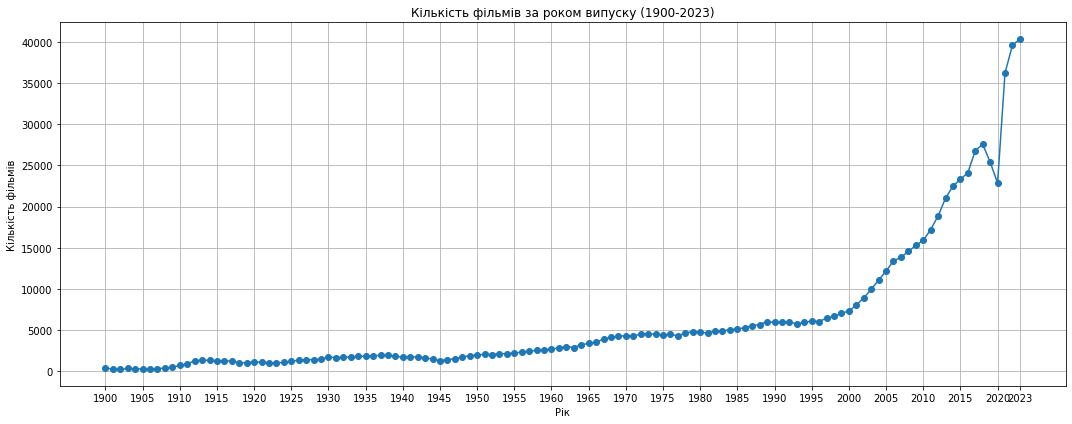

In [71]:
import matplotlib.pyplot as plt

films_by_year = df_filtered['release_year'].value_counts().sort_index()
films_by_year_range = films_by_year[(films_by_year.index >= 1900) & (films_by_year.index <= 2023)]

plt.figure(figsize=(15, 6))
plt.plot(films_by_year_range.index, films_by_year_range.values, marker='o', linestyle='-')
plt.title('Кількість фільмів за роком випуску (1900-2023)')
plt.xlabel('Рік')
plt.ylabel('Кількість фільмів')
plt.grid(True)
plt.xticks(films_by_year_range.index[::5].tolist() + [films_by_year_range.index[-1]]) # Показуємо кожен 5-й рік на осі X та останній рік
plt.tight_layout()
plt.show()